# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [158]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import sem
from math import sqrt
from numpy.random import seed
medical = pd.read_csv(r'C:\Users\kcnsd\Documents\springboarddocs\StatsCase Study\Frequentist Case Study\insurance2.csv')

In [156]:
medical.shape

(1338, 8)

In [93]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

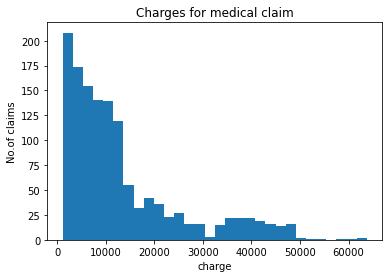

Mean of Charges 13270.422265141257 & Standard Deviation of charges 12105.484975561605
Mean of Dataframe age                  39.207025
sex                   0.505232
bmi                  30.663397
children              1.094918
smoker                0.204783
region                1.515695
charges           13270.422265
insuranceclaim        0.585202
dtype: float64 STD of dataframe age                  14.044709
sex                   0.499973
bmi                   6.095908
children              1.205042
smoker                0.403543
region                1.104472
charges           12105.484976
insuranceclaim        0.492687
dtype: float64


In [94]:
#create a histogram
#binsize = [12000,24000,36000,48000,60000,72000,84000]
_ = plt.hist(medical['charges'],bins=30)
#_ = plt.hist(medical['charges'],bins=binsize)
_ = plt.title('Charges for medical claim')
_ = plt.xlabel('charge')
_ = plt.ylabel('No.of claims')
plt.show()

Mean = np.mean(medical['charges'])
STD = np.std(medical['charges'])
print('Mean of Charges',Mean,'&' , 'Standard Deviation of charges' ,STD)

#MeanDF = np.mean(medical)
#STDDF = np.std(medical)
print('Mean of Dataframe',np.mean(medical), 'STD of dataframe',np.std(medical))


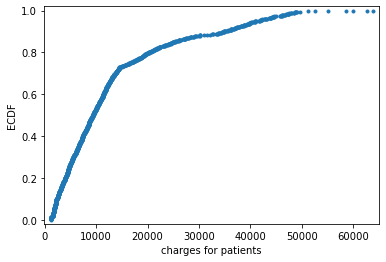

In [95]:
x = np.sort(medical['charges'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker= '.', linestyle='none')
_ = plt.xlabel('charges for patients')
_ = plt.ylabel('ECDF')
plt.margins(0.02) 
plt.show()

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:The charges average (mean charges are slightly above 12000. We have 1338 rows. That is a big enough sample to represent the population. The most appropriate test in this case should be a one sided test. If average charges are more than 12K then the hospital stays solvent. If the charges are less than or equal to 12K the hospital becomes insolvent. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

In [143]:
Onesided = t.ppf(.95,Mean)
print("Critical value:",Onesided)

Critical value: 1.6449684594822604


__A:__One sided tail is more appropriate here. We are only concerned with finding out if the mean is going to be below 12K in charges

In [166]:
t_crit = t.ppf(0.975, len(medical.charges)-1)
se = STD/np.sqrt(len(medical.charges))
me = t_crit*se
print('The 95% confidence level is', (Mean-me), 'to', (Mean+me))

The 95% confidence level is 12621.196780689985 to 13919.647749592528


In [168]:
#use .95 for confidence use mean of charges = 13270.42 and std of charges as 12105
onesided = norm.ppf(0.95, loc=13270.42, scale=12105.48)
print(onesided)
#now cut the signficant in error in harlf to get two tail test 
#twosided = norm.ppf(0.975, loc=13270.42, scale=12105.48)
#print(twosided)

33182.16268398851


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
Null Hypothesis: The is no significant difference between the means of the insured and uninsured population.

Alternative Hypothesis: The is a statistical differece between the means of the two populations. We are assuming the variances are equal.
If the t scores for two populations is very close i.e. the difference in the mean is not big than the populations are similar. If the mean of the populations are large then the t score could be large and populations would be difference. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [137]:
#filter data set based on insuranceclaim
InsuranceClaims = medical.loc[medical['insuranceclaim'] == 1] 
#InsuranceClaims.head()
#extract the column of insterest 
InsruanceCharges = InsuranceClaims['charges']
InsruanceCharges.head()

0     16884.9240
1      1725.5523
4      3866.8552
6      8240.5896
10     2721.3208
Name: charges, dtype: float64

In [138]:
Non_insuranceclaims =  medical.loc[medical['insuranceclaim'] == 0]
#Non_insuranceclaims.head()
Non_InsruanceCharges = Non_insuranceclaims['charges']
Non_InsruanceCharges.head()

2     4449.46200
3    21984.47061
5     3756.62160
7     7281.50560
8     6406.41070
Name: charges, dtype: float64

In [178]:
# calculate means
mean1, mean2 = np.mean(InsruanceCharges), np.mean(Non_InsruanceCharges)
print('Means',mean1,mean2)
# calculate sample standard deviations
std1, std2 = np.std(InsruanceCharges), np.std(Non_InsruanceCharges)
print('Stds', std1,std2)
# calculate standard errors
n1, n2 = len(InsruanceCharges), len(Non_InsruanceCharges)
print('lens',n1,n2)
#sqrn1, sqrn2 = sqrt(n1), sqrt(n2)
se1, se2 = std1/sqrn1, std2/sqrn2
#the built in standard error of mean complains about getting an array when expecting float.
#se1, se2 = sem(InsruanceCharges), sem(Non_InsruanceCharges)
# standard error on the difference between the samples
sed = sqrt(se1**2.0 + se2**2.0)
varinsured, varNonisured = np.var(InsruanceCharges) , np.var(Non_InsruanceCharges)
#calculate sp, don't squre the varinace twice the formula is the squre of deviation so use it as varinsured and not varisnured **2
sp = np.sqrt(
    (
        ((n1-1)*(varinsured))
        +((n2-1)*(varNonisured))
    )/(n1+n2-2)
)
print('This is sp',sp)
# calculate the t statistic
t_stat = (mean1 - mean2) / (sp*np.sqrt((1/n1)+(1/n2)))
print('This is t test',t_stat)
#get the p value
pvalue = 1-(t.cdf(t_stat,n1+n2-1))
print('this is pvalue',pvalue)
print('this is tstat',t_stat,'this is pvalue' ,pvalue)
#test the null hyptothis using scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
stats.ttest_ind(InsruanceCharges,Non_InsruanceCharges,nan_policy='omit')


#use this formula to get sp and then complete the t test should be around 11 something.
#sp = np.sqrt(((n0-1)*s0 * 2 + (n1-1)*s1 * 2) / (n0+n1-2))
#t_stat = (x0 -x1) / (sp * np.sqrt(1/n0 + 1/n1))
#print(t_stat)
# https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

Means 16423.928276537663 8821.421892306294
Stds 14036.956250260411 6440.699841605233
lens 783 555
This is sp 11512.282899205744
This is t test 11.901306943555385
this is pvalue 0.0
this is tstat 11.901306943555385 this is pvalue 0.0


Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ from scipy.stats: https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html
you will find t https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html#scipy.stats.t
There is no Z test in scipy.stats. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test